<a href="https://colab.research.google.com/github/sainthm/MGS_AI_DS/blob/main/team2_crawlling_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 배틀그라운드의 흥망성쇠

In [1]:
# 라이브러리 사용
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import plotly.express as px

# matplotlib.rcParams['font family'] = 'Malgun Gothic' # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

## index
1. 전반적인 게임 업계 소개
2. 배틀그라운드에 대한 간략한 소개
3. 글로벌 배틀그라운드(스팀 플랫폼), 국내 배틀그라운드(카카오 플랫폼) 소개
4. EDA 프로세스 소개
5. 결론
6. Q&A

## 1. 전반적인 게임 업계 소개
- 내용

> 들여쓴 블록



## 2. 배틀그라운드에 대한 간략한 소개
- 프로젝트 메인 주제: 배틀그라운드

## 3. 글로벌 배틀그라운드(스팀 플랫폼), 국내 배틀그라운드((현) 다음 플랫폼, (구) 카카오 배그) 소개
- 내용

## 4. EDA 프로세스 소개
- 글로벌 데이터(스팀 플랫폼)
  - 동시 접속자 변화
  - 피크 접속자 변화
  - 게임 리뷰 데이터 변화
  - 게임 가격 변동치
  - 이용제한 현황(계정 블럭)


- 국내 데이터(다음 플랫폼)
  - 피시방 점유율 변동치  
  - 국내 유튜버 데이터 변동치
  - 이용제한 현황(계정 블럭)

In [71]:
# csv file import
# 데이터 확인 - 1
# 동시 접속자 변화
## lifetime_concurrent = ltc
ltc = pd.read_csv('./project1/lifetime_concurrent_players_chart.csv', sep =',')
ltc.head(5)

DateTime  Players  Twitch Viewers  Flags
0  2016-09-09 00:00:00      NaN           40509    NaN
1  2016-09-10 00:00:00      NaN            9690    NaN
2  2016-09-11 00:00:00      NaN               0    NaN
3  2016-09-12 00:00:00      NaN               1    NaN
4  2016-09-13 00:00:00      NaN              22    NaN

In [47]:
# 필요없는 columns 삭제
# ltc = ltc.drop('Flags', axis=1)
# df = df.drop('Flags', axis=1)
ltc.head(5)

DateTime  Players  Twitch Viewers
0  2016-09-09 00:00:00      NaN           40509
1  2016-09-10 00:00:00      NaN            9690
2  2016-09-11 00:00:00      NaN               0
3  2016-09-12 00:00:00      NaN               1
4  2016-09-13 00:00:00      NaN              22

In [34]:
# 데이터 확인 - 2
# twitch 시청자수 describe
ltc['Twitch Viewers'].describe()

count      2197.000000
mean      67002.246245
std       51564.030380
min           0.000000
25%       33983.000000
50%       53743.000000
75%       93985.000000
max      597309.000000
Name: Twitch Viewers, dtype: float64

In [72]:
# ltc 전처리 - 1
df = pd.read_csv('./project1/lifetime_concurrent_players_chart.csv', sep =',')
ltc.head(5)

DateTime  Players  Twitch Viewers  Flags
0  2016-09-09 00:00:00      NaN           40509    NaN
1  2016-09-10 00:00:00      NaN            9690    NaN
2  2016-09-11 00:00:00      NaN               0    NaN
3  2016-09-12 00:00:00      NaN               1    NaN
4  2016-09-13 00:00:00      NaN              22    NaN

In [36]:
# ltc 전처리 - 2

ltc_df = df.groupby('DateTime').Players.sum().reset_index()
ltc_df

DateTime   Players
0     2016-09-09 00:00:00       0.0
1     2016-09-10 00:00:00       0.0
2     2016-09-11 00:00:00       0.0
3     2016-09-12 00:00:00       0.0
4     2016-09-13 00:00:00       0.0
...                   ...       ...
2192  2022-09-10 00:00:00  412853.0
2193  2022-09-11 00:00:00  442131.0
2194  2022-09-12 00:00:00  423516.0
2195  2022-09-13 00:00:00  425046.0
2196  2022-09-14 00:00:00  160670.0

[2197 rows x 2 columns]

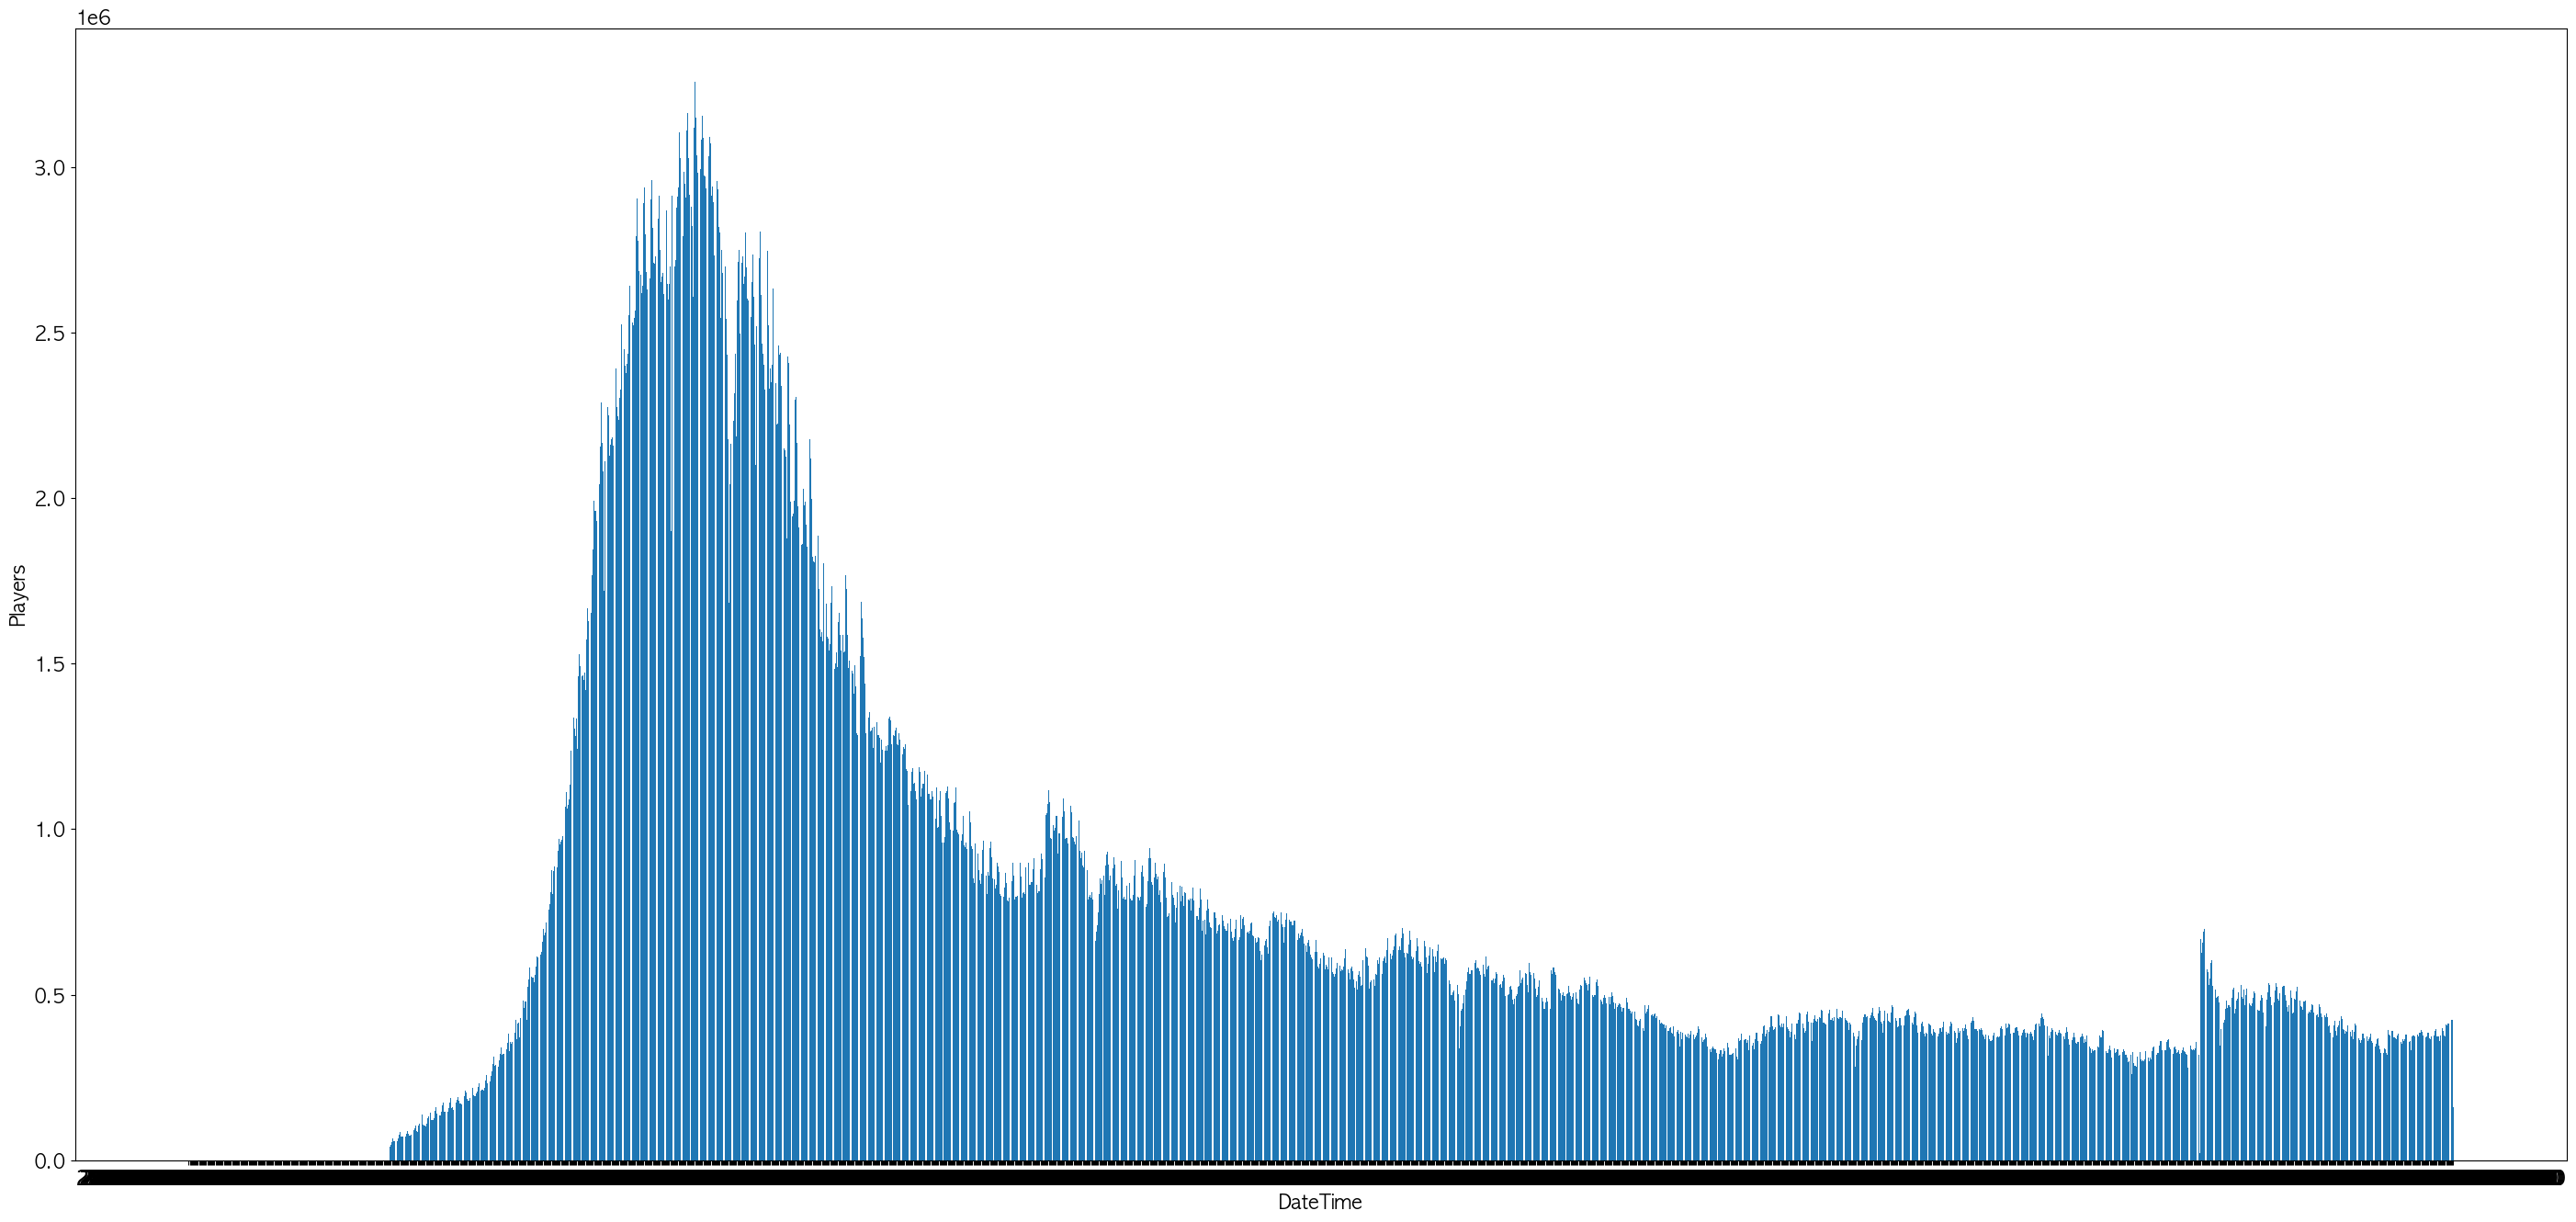

In [37]:
# 데이터 시각화
# lifetime concurrent
# plt bar
plt.figure(figsize=(35, 16))
plt.bar(ltc_df['DateTime'], ltc_df['Players'])
plt.ylabel('Players')
plt.xlabel('DateTime')
plt.show()


In [38]:
# 데이터 시각화
# lifetime concurrent
# Time Series and Date Axes in Python
fig = px.line(ltc_df, x='DateTime', y="Players")
fig.show()


In [39]:
# 트위치 시청자수 데이터 활용
df.rename(columns = {'Twitch Viewers' : 'TwitchViewers'}, inplace = True)
lt_twitch_df = df.groupby('DateTime').TwitchViewers.sum().reset_index()
lt_twitch_df

DateTime  TwitchViewers
0     2016-09-09 00:00:00          40509
1     2016-09-10 00:00:00           9690
2     2016-09-11 00:00:00              0
3     2016-09-12 00:00:00              1
4     2016-09-13 00:00:00             22
...                   ...            ...
2192  2022-09-10 00:00:00          30037
2193  2022-09-11 00:00:00          31689
2194  2022-09-12 00:00:00          23365
2195  2022-09-13 00:00:00          25821
2196  2022-09-14 00:00:00           7655

[2197 rows x 2 columns]

In [40]:
# 데이터 시각화
# 트위치 시청자수 데이터 활용
# Time Series and Date Axes in Python
fig = px.line(df, x='DateTime', y="TwitchViewers")
fig.show()

In [48]:
# df = df.drop('Flags', axis=1)
df.columns

Index(['DateTime', 'Players', 'TwitchViewers'], dtype='object')

In [50]:
# 데이터 시각화
# 트위치 시청자수 데이터 활용
# Time Series and Date Axes in Python
fig = px.line(df, x='DateTime', y=df.columns)
fig.show()

In [73]:
# 스팀 게임 비교 - 1
# 2018년 전후 출시된 대작 스팀 게임 10개와 비교 (시리즈 게임 포함)
df_steam_2018_epic = pd.read_csv('./project1/steam_10_2018_epic_games_compare(lt).csv', sep =',')
df_steam_2018_epic.head(5)


DateTime  Counter-Strike: Global Offensive  \
0  2010-09-20 00:00:00                               NaN   
1  2010-09-21 00:00:00                               NaN   
2  2010-09-22 00:00:00                               NaN   
3  2010-09-23 00:00:00                               NaN   
4  2010-09-24 00:00:00                               NaN   

   Sid Meier's Civilization V  Grand Theft Auto V  \
0                     18411.0                 NaN   
1                     39886.0                 NaN   
2                     38495.0                 NaN   
3                     53585.0                 NaN   
4                     68809.0                 NaN   

   Sid Meier's Civilization VI  The Elder Scrolls V: Skyrim Special Edition  \
0                          NaN                                          NaN   
1                          NaN                                          NaN   
2                          NaN                                          NaN   
3                          NaN                                          NaN   
4                          NaN                                          NaN   

   Far Cry 5  PUBG: BATTLEGROUNDS  Monster Hunter: World  \
0        NaN                  NaN                    NaN   
1        NaN                  NaN                    NaN   
2        NaN                  NaN                    NaN   
3        NaN                  NaN                    NaN   
4        NaN                  NaN                    NaN   

   Assassin's Creed Odyssey  太吾绘卷 The Scroll Of Taiwu  
0                       NaN                       NaN  
1                       NaN                       NaN  
2                       NaN                       NaN  
3                       NaN                       NaN  
4                       NaN                       NaN

In [52]:
# 스팀 게임 비교 - 전처리
# 2018년 전후 출시된 대작 스팀 게임 10개와 비교 (시리즈 게임 포함)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DateTime       2197 non-null   object 
 1   Players        2007 non-null   float64
 2   TwitchViewers  2197 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 51.6+ KB


In [53]:
# 스팀 게임 비교 - 전처리
# 2018년 전후 출시된 대작 스팀 게임 10개와 비교 (시리즈 게임 포함)

df_steam_2018_epic.columns

Index(['DateTime', 'Counter-Strike: Global Offensive',
       'Sid Meier's Civilization V', 'Grand Theft Auto V',
       'Sid Meier's Civilization VI',
       'The Elder Scrolls V: Skyrim Special Edition', 'Far Cry 5',
       'PUBG: BATTLEGROUNDS', 'Monster Hunter: World',
       'Assassin's Creed Odyssey', '太吾绘卷 The Scroll Of Taiwu'],
      dtype='object')

In [54]:
# 스팀 게임 비교 - 전처리
# 2018년 전후 출시된 대작 스팀 게임 10개와 비교 (시리즈 게임 포함)

df_steam_2018_epic.tail(5)


DateTime  Counter-Strike: Global Offensive  \
4372  2022-09-09 00:00:00                         1016382.0   
4373  2022-09-10 00:00:00                         1029224.0   
4374  2022-09-11 00:00:00                         1062931.0   
4375  2022-09-12 00:00:00                          943540.0   
4376  2022-09-13 00:00:00                          932805.0   

      Sid Meier's Civilization V  Grand Theft Auto V  \
4372                     18943.0            155840.0   
4373                     21916.0            167797.0   
4374                     23140.0            173700.0   
4375                     18678.0            142430.0   
4376                     17984.0            140061.0   

      Sid Meier's Civilization VI  \
4372                      51257.0   
4373                      60402.0   
4374                      62665.0   
4375                      46503.0   
4376                      45390.0   

      The Elder Scrolls V: Skyrim Special Edition  Far Cry 5  \
4372                                      23388.0     2491.0   
4373                                      28735.0     2850.0   
4374                                      31480.0     3080.0   
4375                                      24080.0     2183.0   
4376                                      22513.0     2185.0   

      PUBG: BATTLEGROUNDS  Monster Hunter: World  Assassin's Creed Odyssey  \
4372             413251.0                21147.0                    4662.0   
4373             412853.0                22166.0                    5413.0   
4374             442131.0                22699.0                    6215.0   
4375             423516.0                20228.0                    4664.0   
4376             425046.0                19701.0                    4691.0   

      太吾绘卷 The Scroll Of Taiwu  
4372                    2107.0  
4373                    2335.0  
4374                    2462.0  
4375                    2539.0  
4376                    2481.0

In [55]:
# 2018년 전후 출시된 대작 스팀 게임 10개와 비교 (시리즈 게임 포함)
row_num = range(4377)
col = ["Counter-Strike: Global Offensive", "Sid Meier's Civilization V", "Grand Theft Auto V", "Sid Meier's Civilization VI", "The Elder Scrolls V: Skyrim Special Edition", "Far Cry 5", "PUBG: BATTLEGROUNDS", "Monster Hunter: World", "Assassin's Creed Odyssey", "太吾绘卷 The Scroll Of Taiwu"]

df_steam_2018_epic["PUBG: BATTLEGROUNDS"]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4372    413251.0
4373    412853.0
4374    442131.0
4375    423516.0
4376    425046.0
Name: PUBG: BATTLEGROUNDS, Length: 4377, dtype: float64

In [56]:
# 2018년 전후 출시된 대작 스팀 게임 10개와 비교 (시리즈 게임 포함)
# 하나의 데이터프레임으로 합치기 위한 작업
for y in row_num:
    for x in col:
        df_steam_2018_epic_vis = df_steam_2018_epic[x][y]
        

In [57]:
# 2018년 전후 출시된 대작 스팀 게임 10개와 비교 (시리즈 게임 포함)
df_steam_2018_epic.columns

Index(['DateTime', 'Counter-Strike: Global Offensive',
       'Sid Meier's Civilization V', 'Grand Theft Auto V',
       'Sid Meier's Civilization VI',
       'The Elder Scrolls V: Skyrim Special Edition', 'Far Cry 5',
       'PUBG: BATTLEGROUNDS', 'Monster Hunter: World',
       'Assassin's Creed Odyssey', '太吾绘卷 The Scroll Of Taiwu'],
      dtype='object')

In [58]:
# 데이터 시각화
# 2018년 전후 출시된 대작 스팀 게임 10개와 비교 (시리즈 게임 포함)
plt.figure(figsize=(35, 16))
fig = px.line(df_steam_2018_epic, x="DateTime", y=["Counter-Strike: Global Offensive", "Sid Meier's Civilization V", "Grand Theft Auto V", "Sid Meier's Civilization VI", "The Elder Scrolls V: Skyrim Special Edition", "Far Cry 5", "PUBG: BATTLEGROUNDS", "Monster Hunter: World", "Assassin's Creed Odyssey", "太吾绘卷 The Scroll Of Taiwu"])
fig.show()

<Figure size 3500x1600 with 0 Axes>

In [74]:
# 현재 스팀에서 판매중인 배틀로얄 장르 Top10(All-Time peak 기준) 동시 접속자수 분석
df_steam_battle_royale_top_10 = pd.read_csv('./project1/steam_10_battle_royale_compare(lt).csv', sep =',')
df_steam_battle_royale_top_10.head(5)

DateTime  Geneshift  Z1 Battle Royale  PUBG: BATTLEGROUNDS  \
0  2016-02-01 00:00:00        NaN           20916.0                  NaN   
1  2016-02-02 00:00:00        NaN               NaN                  NaN   
2  2016-02-03 00:00:00        NaN               NaN                  NaN   
3  2016-02-04 00:00:00        NaN               NaN                  NaN   
4  2016-02-05 00:00:00        NaN               NaN                  NaN   

   Ring of Elysium  Realm Royale Reforged  Fall Guys  Apex Legends  \
0              NaN                    NaN        NaN           NaN   
1              NaN                    NaN        NaN           NaN   
2              NaN                    NaN        NaN           NaN   
3              NaN                    NaN        NaN           NaN   
4              NaN                    NaN        NaN           NaN   

   NARAKA: BLADEPOINT  Battlefield™ V  Crab Game  
0                 NaN             NaN        NaN  
1                 NaN             NaN        NaN  
2                 NaN             NaN        NaN  
3                 NaN             NaN        NaN  
4                 NaN             NaN        NaN

In [60]:
# 현재 스팀에서 판매중인 배틀로얄 장르 Top10(All-Time peak 기준) 동시 접속자수 분석
# column 확인
df_steam_battle_royale_top_10.columns

Index(['DateTime', 'Geneshift', 'Z1 Battle Royale', 'PUBG: BATTLEGROUNDS',
       'Ring of Elysium', 'Realm Royale Reforged', 'Fall Guys', 'Apex Legends',
       'NARAKA: BLADEPOINT', 'Battlefield™ V', 'Crab Game'],
      dtype='object')

In [61]:
# 데이터 시각화
# 현재 스팀에서 판매중인 배틀로얄 장르 Top10(All-Time peak 기준) 동시 접속자수 분석
plt.figure(figsize=(35, 16))
fig = px.line(df_steam_battle_royale_top_10, x="DateTime", y=['Geneshift', 'Z1 Battle Royale', 'PUBG: BATTLEGROUNDS', 'Ring of Elysium', 'Realm Royale Reforged', 'Fall Guys', 'Apex Legends', 'NARAKA: BLADEPOINT', 'Battlefield™ V', 'Crab Game'])
fig.show()

<Figure size 3500x1600 with 0 Axes>

# 내일 할일:
### 0. 데이터 취합
### 1. 배그 vs 포트나이트 
### 2. 스팀 이용제한 수 찾아서 정리 (어려우면 3번으로 이동)
### 3. 카카오 이용제한 링크에서 데이터 추출
### 4. 결론 내기

In [63]:
# 포트나이트 비교
# URL List:
# https://www.statista.com/statistics/746230/fortnite-players/
# https://culturedvultures.com/wp-content/uploads/2019/11/Fortnite-revenue.jpg
# https://trends.edison.tech/research/fortnite-sales-19.html
# https://trends.edison.tech/assets/img/chart-gaming-1.png
# https://www.gamespot.com/articles/fortnite-just-passed-a-wild-new-player-milestone/1100-6463145/


In [75]:
'''
게임 가격 변화
lifetime_price = lpc
병합시 file_path 수정 필요
'''

lpc = pd.read_csv('./mini_project/lifetime_price_chart.csv', sep =',')

# NaN값 0으로 채우기
lpc.fillna(0, inplace=True)

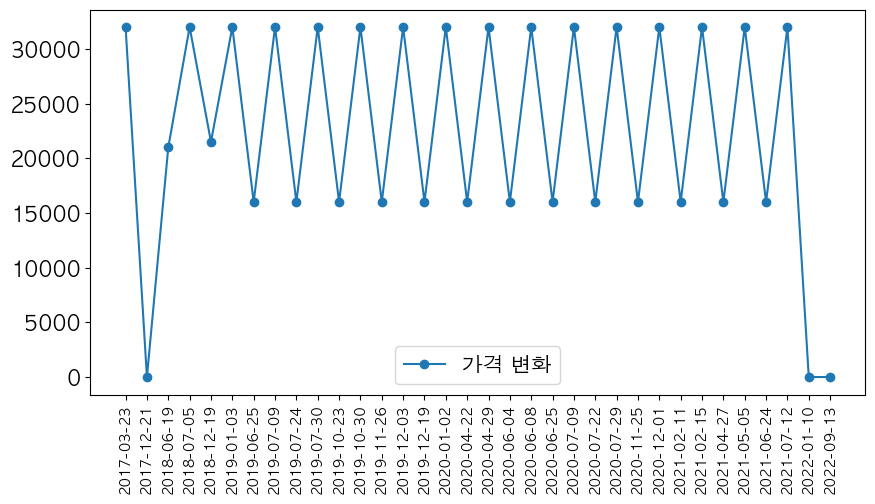

In [65]:
'''
차트에 그려질 x, y 축 값 변수로 저장
x 축 데이터에 시간 정보 제거후 날짜값만 리스트로 저장
'''

x = [date.split(' ')[0] for date in lpc['DateTime']]
y = lpc['Final price']

# 차트 크기 조절
plt.figure(figsize=(10, 5))

# 차트 그리기 
plt.plot(x, y, marker='o', label='가격 변화')

# 범례설정
plt.legend()

# 축 텍스트 45도로 회전 및 텍스트 크기 줄이기
plt.xticks(rotation=90, fontsize=10)

# 불필요한 텍스트 제거 (그래프만 표시)
plt.show()

In [66]:
'''
pc방 점유율 변화
pc_room_share = prs
병합시 file_path 수정 필요
'''

# 데이터 불러오기
prs = pd.read_excel('./mini_project/pc_room_share_chart.xlsx', skiprows=[0])
prs

date  rank  use_time  percent  use_tiem_previous_week
0    2019년 1월 1주     2   6955501    19.30                    -2.3
1    2019년 1월 2주     2   6450853    19.80                    -7.3
2    2019년 1월 3주     2   6399365    19.80                    -0.8
3    2019년 1월 4주     2   6264674    18.90                    -2.1
4    2019년 1월 5주     2   6211473    17.30                    -0.8
..           ...   ...       ...      ...                     ...
133  2021년 8월 4주     3   1126751     7.28                    -6.3
134  2021년 9월 1주     3   1049311     6.88                    -6.9
135  2021년 9월 2주     3   1001337     6.66                    -4.9
136  2021년 9월 3주     4   1066526     6.63                     6.5
137  2021년 9월 4주     3   1290532     6.69                    21.0

[138 rows x 5 columns]

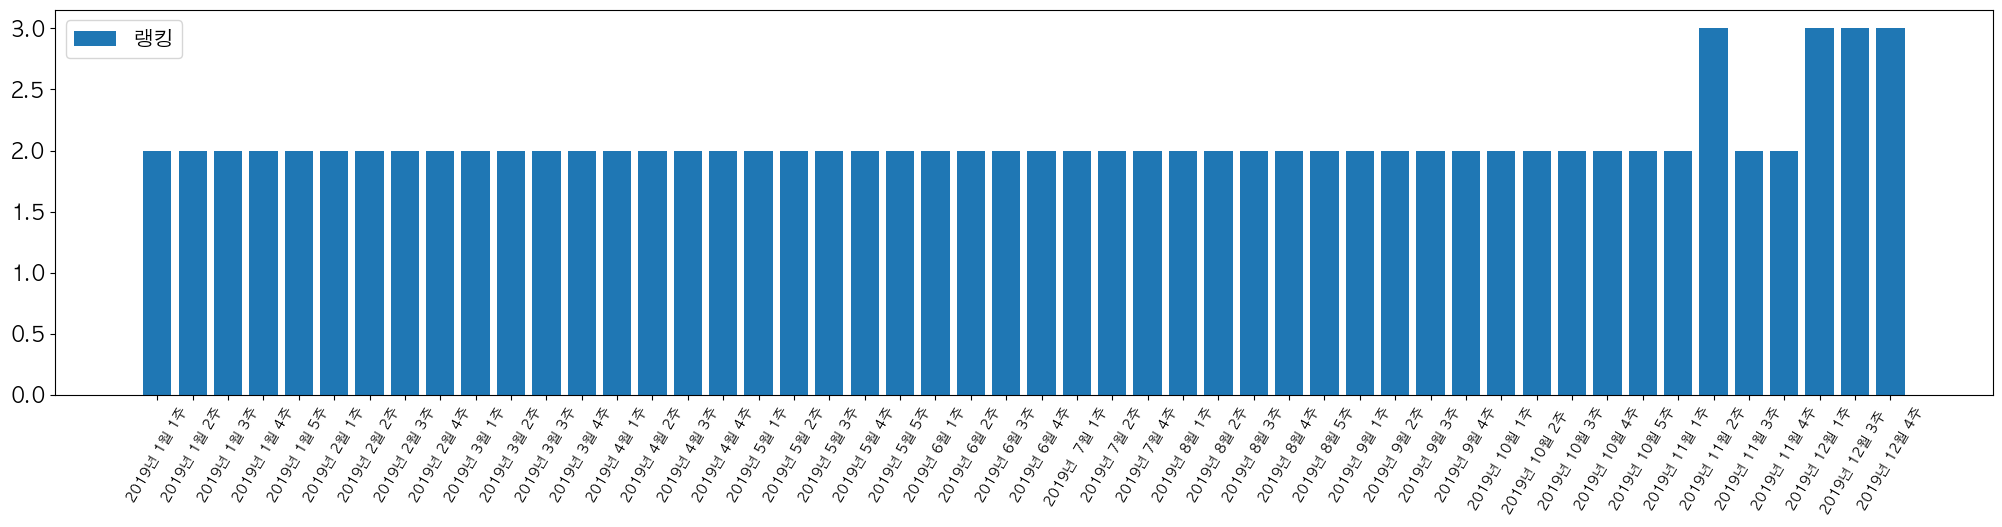

In [67]:
def drow_rank_chart(year):
    ''' 년도 입력을 받아 해당 년도의 정보만 가져와 랭킹 차트를 그리는 함수 '''
    
    # 입력 받은 년도정보만 가져오기
    date = prs[prs['date'].str.contains(str(year))]

    # 차트 크기 조절
    plt.figure(figsize=(25, 5))
    
    # 차트 그리기
    plt.bar(date['date'], date['rank'], label='랭킹')
    
    # x축 글자 60도 회전 시키기 및 글자 사이즈 조절
    plt.xticks(rotation=60, fontsize=10)
    
    # 범례
    plt.legend()
    plt.show()
    
drow_rank_chart(2019)

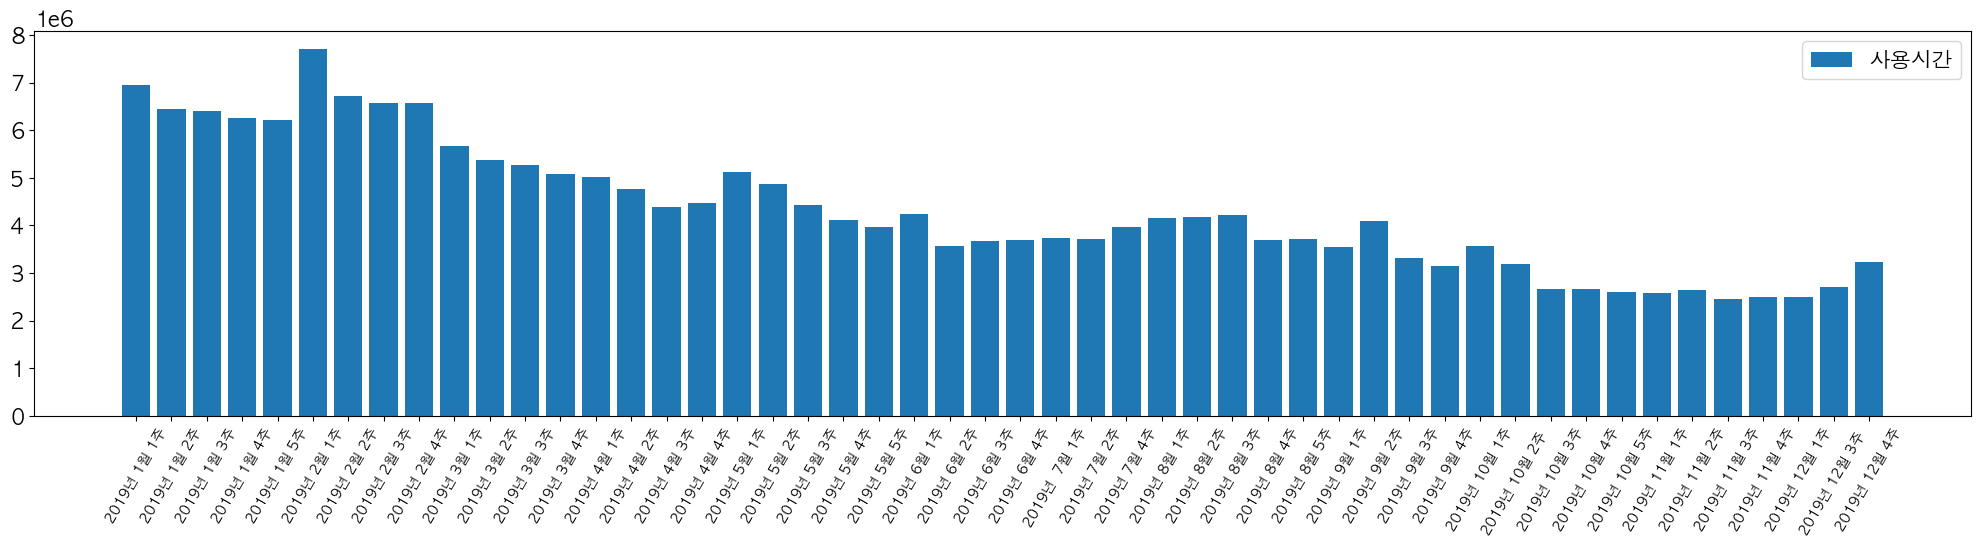

In [68]:
def drow_use_time_chart(year):
    ''' 년도 입력을 받아 해당 년도의 정보만 가져와 사용시간 차트를 그리는 함수 '''
    
    # 입력 받은 년도정보만 가져오기
    date = prs[prs['date'].str.contains(str(year))]

    # 차트 크기 조절
    plt.figure(figsize=(25, 5))
    
    # 차트 그리기
    plt.bar(date['date'], date['use_time'], label='사용시간')
    
    # x축 글자 60도 회전 시키기 및 글자 사이즈 조절
    plt.xticks(rotation=60, fontsize=10)
    
    # 범례
    plt.legend()
    plt.show()
    
drow_use_time_chart(2019)

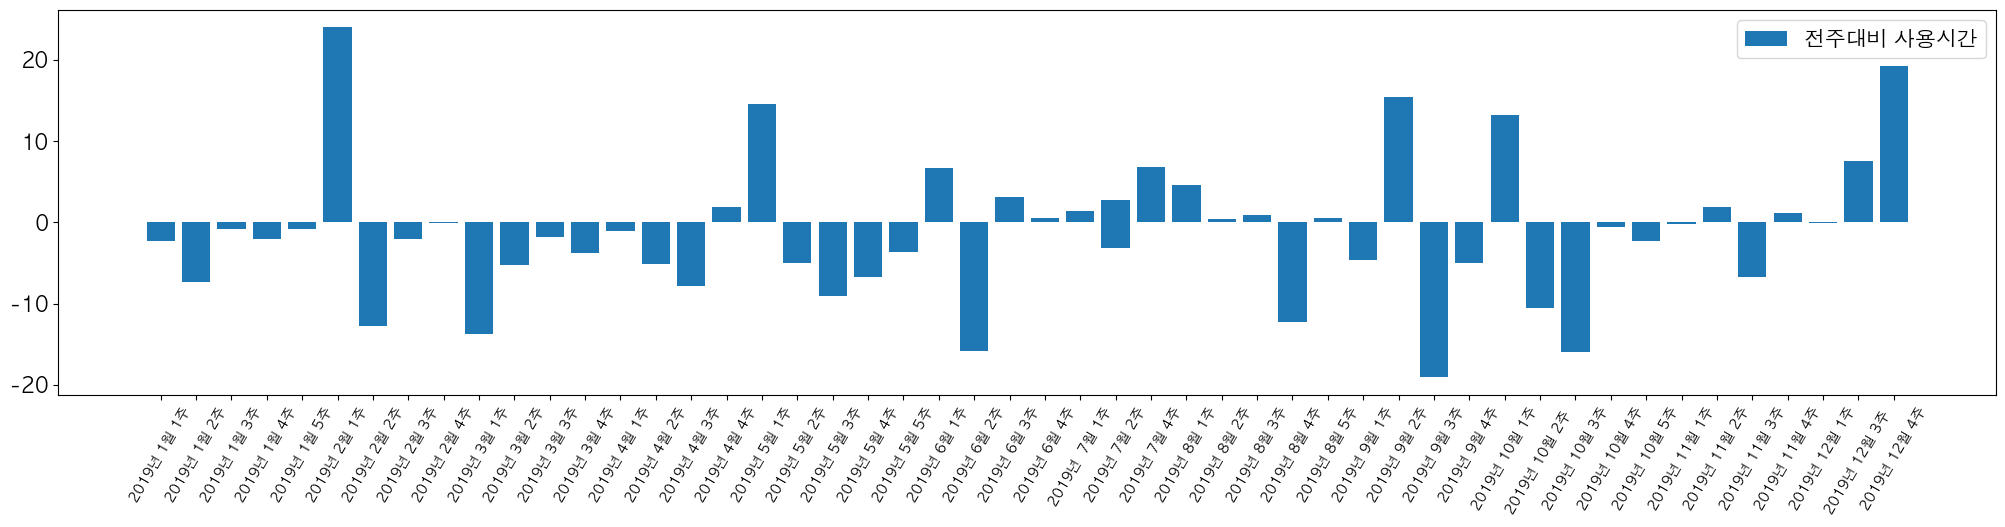

In [69]:
def drow_utpw_chart(year):
    ''' 년도 입력을 받아 해당 년도의 정보만 가져와 전주대비 사용시간 차트를 그리는 함수 '''
    
    # 입력 받은 년도정보만 가져오기
    date = prs[prs['date'].str.contains(str(year))]

    # 차트 크기 조절
    plt.figure(figsize=(25, 5))
    
    # 차트 그리기
    plt.bar(date['date'], date['use_tiem_previous_week'], label='전주대비 사용시간')
    
    # x축 글자 60도 회전 시키기 및 글자 사이즈 조절
    plt.xticks(rotation=60, fontsize=10)
    
    # 범례
    plt.legend()
    plt.show()
    
drow_utpw_chart(2019)


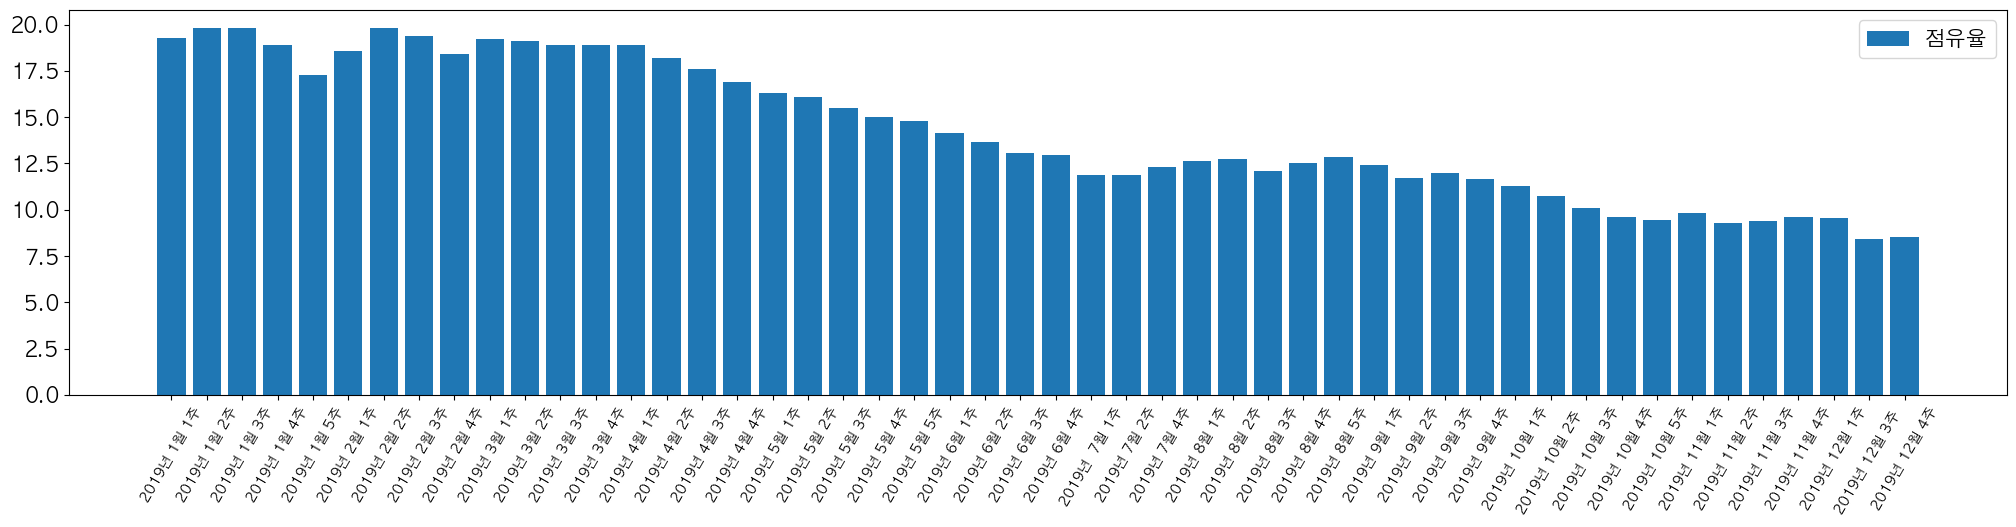

In [70]:
def drow_percent_chart(year):
    ''' 년도 입력을 받아 해당 년도의 정보만 가져와 점유율 차트를 그리는 함수 '''
    
    # 입력 받은 년도정보만 가져오기
    date = prs[prs['date'].str.contains(str(year))]

    # 차트 크기 조절
    plt.figure(figsize=(25, 5))
    
    # 차트 그리기
    plt.bar(date['date'], date['percent'], label='점유율')
    
    # x축 글자 60도 회전 시키기 및 글자 사이즈 조절
    plt.xticks(rotation=60, fontsize=10)
    
    # 범례
    plt.legend()
    plt.show()
    
drow_percent_chart(2019)


## 5. 결론
- 내용

## 6. Q&A
- 내용